In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_df=pd.read_csv("input/train.csv")

In [4]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_df.shape

(891, 12)

In [6]:
data_df.drop(labels="PassengerId",axis=1,inplace=True)

In [7]:
data_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
Sex_Survived=data_df.groupby(['Sex', 'Survived'] )['Survived'].count()
Sex_Survived

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Survived Count'}, xlabel='Survived: Survival (0 = no; 1 = yes)', ylabel='Total'>

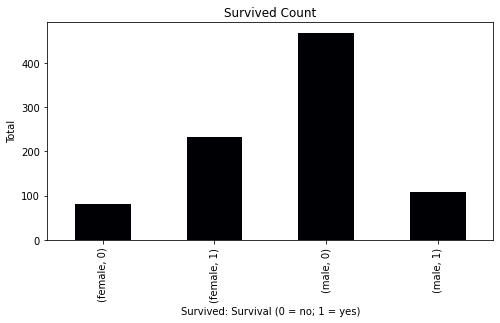

In [9]:
Sex_Survived.plot.bar(xlabel='Survived: Survival (0 = no; 1 = yes)',ylabel='Total',title='Survived Count', colormap='magma',figsize=(8,4))

<AxesSubplot:ylabel='Survived'>

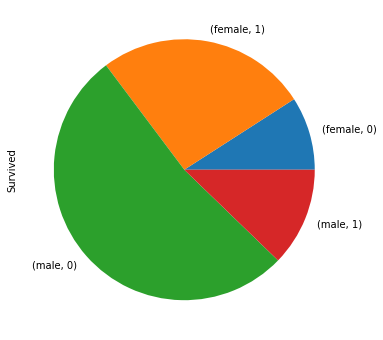

In [10]:
Sex_Survived.plot.pie(figsize=(6,6))

In [12]:
embarked=data_df.groupby(['Embarked','Survived'])['Survived'].count()
embarked

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Survived Count'}, xlabel='Survived: Survival (0 = no; 1 = yes)', ylabel='Total'>

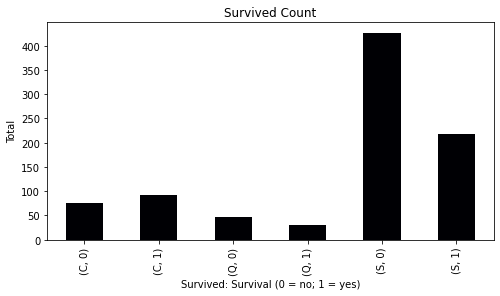

In [13]:
embarked.plot.bar(xlabel='Survived: Survival (0 = no; 1 = yes)',ylabel='Total',title='Survived Count',
            colormap='magma',figsize=(8,4))

In [14]:
data=[data_df]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [15]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [16]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
FamilySize,891.0,1.904602,1.613459,1.00,1.0000,1.0000,2.0,11.0000
IsAlone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


In [17]:
data_df.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
FamilySize      0
IsAlone         0
dtype: int64

In [18]:
value=data_df['Age'].median()
value

28.0

In [19]:
data_df['Age']=data_df['Age'].fillna(value)

In [21]:
data_df['age_class'] = pd.cut(data_df['Age'], 5)

print (data_df[['age_class', 'Survived']].groupby(['age_class'], as_index=False).mean())

          age_class  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.344168
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


In [22]:
data_df['Age_Group']=0
data=[data_df]
for dataset in data:
    
    dataset.loc[ dataset['Age'] <= 16, 'Age_Group'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age_Group'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age_Group'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age_Group'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age_Group'] = 4

<AxesSubplot:xlabel='Age_Group', ylabel='Survived'>

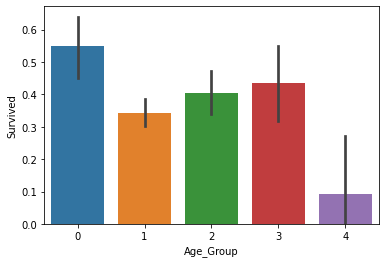

In [23]:
sns.barplot(x='Age_Group',y='Survived',data=data_df)

In [24]:
data_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,age_class,Age_Group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,"(16.336, 32.252]",1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,"(32.252, 48.168]",2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,"(16.336, 32.252]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,"(32.252, 48.168]",2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,"(32.252, 48.168]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,"(16.336, 32.252]",1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,"(16.336, 32.252]",1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,4,0,"(16.336, 32.252]",1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,"(16.336, 32.252]",1


In [25]:
data_df['Embarked']=data_df['Embarked'].fillna('S')

In [26]:
data_df.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        0
FamilySize      0
IsAlone         0
age_class       0
Age_Group       0
dtype: int64

In [27]:
data_df['Embarked']=data_df['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [28]:
data_df['Sex'].replace(['female','male'],[0,1],inplace=True)
data_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,age_class,Age_Group
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,"(16.336, 32.252]",1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,0,"(32.252, 48.168]",2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,"(16.336, 32.252]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,0,"(32.252, 48.168]",2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,1,"(32.252, 48.168]",2


In [29]:
data_df.groupby(['Fare'])['Survived'].count()

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Survived, Length: 248, dtype: int64

In [30]:
data_df['Fare_Type'] = pd.cut(data_df['Fare'], 10)

print (data_df[['Fare_Type', 'Survived']].groupby(['Fare_Type'], as_index=False).mean())

            Fare_Type  Survived
0    (-0.512, 51.233]  0.318306
1   (51.233, 102.466]  0.660377
2  (102.466, 153.699]  0.741935
3  (153.699, 204.932]  1.000000
4  (204.932, 256.165]  0.636364
5  (256.165, 307.398]  0.666667
6   (307.398, 358.63]       NaN
7   (358.63, 409.863]       NaN
8  (409.863, 461.096]       NaN
9  (461.096, 512.329]  1.000000


In [31]:
data_df['Fare_Group']=0
data=[data_df]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 51, 'Fare_Group'] = 0
    dataset.loc[(dataset['Fare'] > 51) & (dataset['Fare'] <= 102), 'Fare_Group'] = 1
    dataset.loc[(dataset['Fare'] > 102) & (dataset['Fare'] <= 153), 'Fare_Group'] = 2
    dataset.loc[(dataset['Fare'] > 153) & (dataset['Fare'] <= 204), 'Fare_Group'] = 3
    dataset.loc[(dataset['Fare'] > 204) & (dataset['Fare'] <= 256), 'Fare_Group'] = 4
    dataset.loc[(dataset['Fare'] > 256) & (dataset['Fare'] <= 307), 'Fare_Group'] = 5
    dataset.loc[(dataset['Fare'] > 307) & (dataset['Fare'] <= 358), 'Fare_Group'] = 6
    dataset.loc[(dataset['Fare'] > 358) & (dataset['Fare'] <= 409), 'Fare_Group'] = 7
    dataset.loc[(dataset['Fare'] > 409) & (dataset['Fare'] <= 461), 'Fare_Group'] = 8
    dataset.loc[ dataset['Fare'] > 461, 'Fare_Group'] = 9

In [32]:
data_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,age_class,Age_Group,Fare_Type,Fare_Group
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,"(16.336, 32.252]",1,"(-0.512, 51.233]",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,0,"(32.252, 48.168]",2,"(51.233, 102.466]",1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,"(16.336, 32.252]",1,"(-0.512, 51.233]",0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,0,"(32.252, 48.168]",2,"(51.233, 102.466]",1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,1,"(32.252, 48.168]",2,"(-0.512, 51.233]",0


In [34]:
columns=['Sex','Embarked','FamilySize','IsAlone','Age_Group','Fare_Group']
train_df=data_df[columns]
train_df.head()

,Sex,Embarked,FamilySize,IsAlone,Age_Group,Fare_Group
0,1,0,2,0,1,0
1,0,1,2,0,2,1
2,0,0,1,1,1,0
3,0,0,2,0,2,1
4,1,0,1,1,2,0


In [35]:
y=data_df['Survived']

In [36]:
test=pd.read_csv("input/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
value_test_age=test['Age'].median()
value_test_age

27.0

In [40]:
test['Age']=test['Age'].fillna(value_test_age)

In [41]:
value_test_fare=test['Fare'].median()
test['Fare']=test['Fare'].fillna(value_test_fare)

In [42]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [43]:
test['Embarked']=test['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [44]:
test['Sex'].replace(['female','male'],[0,1],inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [45]:
test['Age_Group']=0
data=[test]
for dataset in data:
    
    dataset.loc[ dataset['Age'] <= 16, 'Age_Group'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age_Group'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age_Group'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age_Group'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age_Group'] = 4

In [46]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
Age_Group        int64
dtype: object

In [47]:
test['Fare_Group']=0
data_test=[test]
for dataset in data_test:
    dataset.loc[ dataset['Fare'] <= 51, 'Fare_Group'] = 0
    dataset.loc[(dataset['Fare'] > 51) & (dataset['Fare'] <= 102), 'Fare_Group'] = 1
    dataset.loc[(dataset['Fare'] > 102) & (dataset['Fare'] <= 153), 'Fare_Group'] = 2
    dataset.loc[(dataset['Fare'] > 153) & (dataset['Fare'] <= 204), 'Fare_Group'] = 3
    dataset.loc[(dataset['Fare'] > 204) & (dataset['Fare'] <= 256), 'Fare_Group'] = 4
    dataset.loc[(dataset['Fare'] > 256) & (dataset['Fare'] <= 307), 'Fare_Group'] = 5
    dataset.loc[(dataset['Fare'] > 307) & (dataset['Fare'] <= 358), 'Fare_Group'] = 6
    dataset.loc[(dataset['Fare'] > 358) & (dataset['Fare'] <= 409), 'Fare_Group'] = 7
    dataset.loc[(dataset['Fare'] > 409) & (dataset['Fare'] <= 461), 'Fare_Group'] = 8
    dataset.loc[ dataset['Fare'] > 461, 'Fare_Group'] = 9

In [48]:
for dataset in data_test:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

In [49]:
test['IsAlone']=1
for dataset in data_test:

    dataset.loc[ dataset['FamilySize'] > 1, 'IsAlone'] = 0

In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_Group,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2,2,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,2,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2,3,0,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,1,0,3,0


In [51]:
test_df=test[columns]
test_df.head()

,Sex,Embarked,FamilySize,IsAlone,Age_Group,Fare_Group
0,1,2,1,1,2,0
1,0,0,2,0,2,0
2,1,2,1,1,3,0
3,1,0,1,1,1,0
4,0,0,3,0,1,0


In [52]:
submission=pd.read_csv('input/gender_submission.csv')

real_submission=submission['Survived']
real_submission

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train_df,y,test_size=0.3,random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
model_Lr=LogisticRegression(C=0.1)

In [55]:
model_Lr.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [56]:
model_Lr.score(X_test,y_test)

0.8022388059701493

Text(0.5, 1.0, 'Logistic Regression For Train Data')

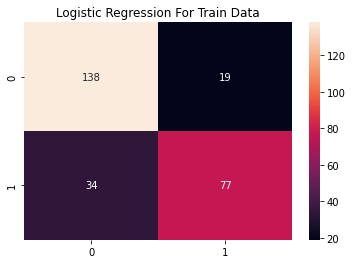

In [57]:
from sklearn.metrics import confusion_matrix

Lr_train_pred=model_Lr.predict(X_test)

cm=confusion_matrix(y_test, Lr_train_pred)

sns.heatmap(cm,annot=True,fmt='2.0f').set_title("Logistic Regression For Train Data")

Text(0.5, 1.0, 'Logistic Regression For Test Data')

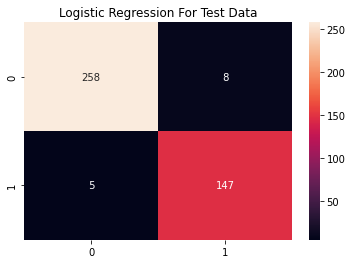

In [58]:
Lr_test_pred=model_Lr.predict(test_df)
cm=confusion_matrix(real_submission,Lr_test_pred)
sns.heatmap(cm,annot=True,fmt='2.0f').set_title('Logistic Regression For Test Data')

In [59]:
predictions = model_Lr.predict(test_df)


predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})


submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [61]:
filename = 'Titanic Predictions .csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions .csv
